In [1]:
# %pip install mlxtend

In [2]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Lectura de datos

<font color="blue">Lee los datos del conjunto ```groceries.csv``` y obtén la matriz binaria **transacción-producto**.</font>

*Sugerencia*:

* Accede a los datos usando la librería de ```Python``` para leer archivos de valores separados por comas: https://docs.python.org/3/library/csv.html
* Construye la lista de transacciones empleando el objeto lector (mediante el comando ```reader``` de ```csv```). El resultado conviértelo a una lista (con el cast ```list```).
* Pasa la lista de transacciones al ```TransactionEncoder``` de ```mlxtend```.

In [3]:
import csv
transactions = []
with open('../files/groceries.csv', newline='') as csvfile:
 rows = csv.reader(csvfile)
 for i in rows:
  transactions.append(i)
transactions =list(transactions)

In [4]:
transactions[:5]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [5]:
TE=TransactionEncoder()
items = TE.fit(transactions).transform(transactions)
items= items.astype("int")
df= pd.DataFrame(items, columns=TE.columns_)
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<font color="blue"> Responde las siguientes preguntas </font>

* ¿Cuántos productos diferentes contiene el conjunto de transacciones?**R=169 productos**
* ¿Cuántas transacciones contiene el archivo? **R=9835 transacciones**
* ¿Cuántos artículos diferentes, en promedio, contienen las transacciones? **R=4 artículos**
* ¿Cuál es el soporte del artículo ```bottled beer```? **120**


In [6]:
#Número de productos
len(df.columns)

169

In [7]:
#Número de transacciones
len(transactions)

9835

In [8]:
#Promedio de productos por transacción
prod = df.sum(axis=1)
prod.mean()

4.409456024402644

In [9]:
#Soporte del ártículo bottled beer
bottled = transactions.count(['bottled beer'])
bottled

120

# Productos más frecuentes

* <font color="blue">Construye una gráfica de barras horizontales mostrando, ordenadamente, los 30 artículos con el mayor soporte.</font>

In [10]:
#Calculando los soportes de los productos de la lista transacciones
soportes = []
for i in range (169):
 s = transactions.count([TE.columns_ [i]])
 soportes.append(s) #los resultados se agregan a la lista soportes


In [11]:
#Creando el dataframe de los soportes con los nombres de los productos
df_sop =pd.DataFrame(soportes,TE.columns_, columns=['Soporte'])
df_sop.head()

,Soporte
Instant food products,3
UHT-milk,10
abrasive cleaner,1
artif. sweetener,1
baby cosmetics,1


In [12]:
#Ordenamos de forma descendente el dataframe que contiene los soportes por producto
df_sop = df_sop.sort_values('Soporte',ascending=False)
df_sop.head(30)

,Soporte
canned beer,260
soda,156
whole milk,121
bottled beer,120
rolls/buns,109
bottled water,67
other vegetables,62
newspapers,54
shopping bags,48
yogurt,40


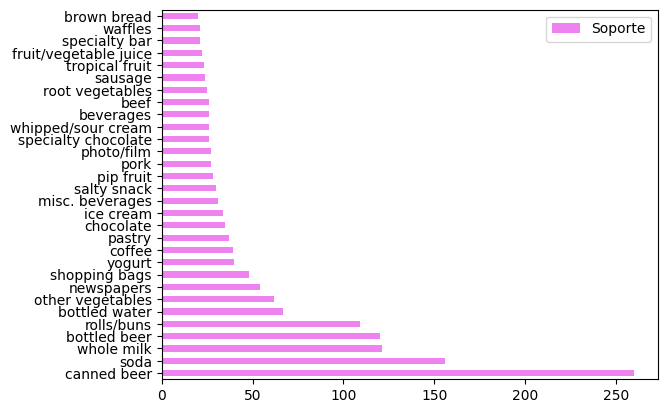

In [13]:
#graficamos los 30 productos más frecuentes
df_sop.head(30).plot(kind = 'barh', color = 'violet');

# Subconjuntos frecuentes

* <font color=cyan> Aplica el algoritmo ```apriori``` para extraer los conjuntos frecuentes. Utiliza un soporte mínimo de una milésima.
* ¿Cuántos conjuntos frecuentes se obtienen?<font color=red>**13492 conjuntos**</font>
* ¿Cuál es el número de artículos, en promedio, que compone a los conjuntos frecuentes?<font color=red>**3 artículos**</font>
</font>

In [14]:
#Aplicamos el algoritmo apriori visto en clase
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)
frequent_itemsets

C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.033452,(UHT-milk)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.026029,(beverages)
4,0.080529,(bottled beer)
...,...,...
117,0.032232,"(whole milk, whipped/sour cream)"
118,0.020742,"(yogurt, whipped/sour cream)"
119,0.056024,"(yogurt, whole milk)"
120,0.023183,"(other vegetables, root vegetables, whole milk)"


In [15]:
#Sacando el promedio de los productos por conjunto
frequent_itemsets['itemsetsnumber'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
itemsets_prom = frequent_itemsets['itemsetsnumber'].mean()
itemsets_prom


1.5327868852459017

# Reglas de asociación

* <font color="cyan"> Identifica todas las reglas de asociación obtenidas sobre los conjuntos frecuentes empleando un umbral de $2$ para la métrica **lift**.
* Muestra las reglas que contengan, solamente, ```bottled beer``` en el consecuente. Ordénalas de acuerdo a la métrica *conviction* de forma descendente y muestra solo las 20 primeras.
</font>

In [16]:
#Identificación de las reglas de asociación
ar=association_rules(frequent_itemsets, metric="lift", min_threshold=2)
reg_aso = pd.DataFrame(ar)
reg_aso

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941,0.688008
1,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693,0.622764
2,(other vegetables),(whipped/sour cream),0.193493,0.071683,0.028876,0.149238,2.081924,0.015006,1.091160,0.644352
3,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,0.015006,1.350565,0.559803
4,(tropical fruit),(pip fruit),0.104931,0.075648,0.020437,0.194767,2.574648,0.012499,1.147931,0.683297
5,(pip fruit),(tropical fruit),0.075648,0.104931,0.020437,0.270161,2.574648,0.012499,1.226392,0.661650
6,(tropical fruit),(yogurt),0.104931,0.139502,0.029283,0.279070,2.000475,0.014645,1.193594,0.558749
7,(yogurt),(tropical fruit),0.139502,0.104931,0.029283,0.209913,2.000475,0.014645,1.132873,0.581197
8,(yogurt),(whipped/sour cream),0.139502,0.071683,0.020742,0.148688,2.074251,0.010742,1.090455,0.601859
9,(whipped/sour cream),(yogurt),0.071683,0.139502,0.020742,0.289362,2.074251,0.010742,1.210881,0.557889


In [17]:
#Mostrando las primeras 20 reglas de asociación que contienen bottled beer en el consecuente
reg_botbeer= reg_aso[reg_aso['consequents'] == {'yogurt'}]
reg_botbeer.sort_values('conviction',ascending=False)
reg_botbeer.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(tropical fruit),(yogurt),0.104931,0.139502,0.029283,0.279070,2.000475,0.014645,1.193594,0.558749
9,(whipped/sour cream),(yogurt),0.071683,0.139502,0.020742,0.289362,2.074251,0.010742,1.210881,0.557889
15,"(other vegetables, whole milk)",(yogurt),0.074835,0.139502,0.022267,0.297554,2.132979,0.011828,1.225003,0.574138


## Reglas de asociación

**(root vegetables) → (other vegetables)**

**(other vegetables, whole milk) → (root vegetables)**

**(yogurt, other vegetables) → (whole milk)**

**(pip fruit) → (tropical fruit)**

**(whipped/sour cream) → (other vegetables)**

1. **(root vegetables) → (other vegetables)**: Esta regla tiene un valor de confianza relativamente alto y un lift mayor que 2, lo que significa que es mucho más probable que los clientes compren otras verduras si ya están comprando verduras de raíz. Esta información es útil para las tiendas porque sugiere que estos dos tipos de verduras podrían colocarse juntos o incluirse en promociones compartidas.

2. **(other vegetables, whole milk) → (root vegetables)**: Similar a la primera regla, pero en la dirección opuesta, esta regla sugiere que la compra conjunta de otras verduras y leche entera está asociada con la compra de verduras de raíz. Esta información podría ser útil para comprender las preferencias de compra de los clientes y para diseñar promociones o descuentos que incentiven la compra de estos productos juntos.

3. **(yogurt, other vegetables) → (whole milk)**: Esta regla indica que los clientes que compran yogurt y otras verduras tienen una alta probabilidad de comprar también leche entera. Esto puede reflejar un patrón de compra donde los consumidores interesados en productos lácteos y verduras tienden a comprar estos productos en la misma visita a la tienda. Esta regla puede ser utilizada para promociones cruzadas o para optimizar la logística y el inventario de estos productos.

4. **(pip fruit) → (tropical fruit)**: Aquellos que compran frutas de pepita (como manzanas y peras) pueden tener una preferencia general por las frutas o estar buscando variedad para su consumo de frutas. Adquirir frutas tropicales junto con frutas de pepita podría ser una manera de disfrutar de una gama más amplia de sabores y nutrientes.

5. **(whipped/sour cream) → (other vegetables)**: Con un lift también mayor que 2, esta regla indica que la compra de crema batida o agria a menudo va acompañada de la compra de otras verduras. Esto podría informar a la tienda para que considere ofertas conjuntas o sugiera recetas que utilicen ambos ingredientes.

## ¿En qué tipo de tienda o industria, consideras que sería interesante aplicar un análisis de reglas de asociación?

Un análisis de reglas de asociación sería muy útil en una tienda de supermercado. En un supermercado, la gente compra muchas cosas diferentes, y sería interesante ver qué productos suelen comprar juntos. Por ejemplo, si muchas personas compran leche cuando compran cereal, la tienda podría poner esos productos cerca uno del otro o hacer ofertas especiales para que la gente compre ambos. Así, la tienda puede vender más y los clientes pueden encontrar más fácilmente lo que necesitan.

Otro lugar interesante para aplicar las reglas de asociación es en una tienda en línea, como una página web donde se venden todo tipo de cosas. Al igual que en el supermercado, en una tienda en línea se pueden analizar las compras de la gente para ver qué productos suelen comprar juntos. Por ejemplo, si alguien compra una funda para su teléfono móvil, quizás también esté interesado en comprar un protector de pantalla. Con esta información, la tienda en línea puede sugerir productos que podrían interesar al cliente, haciendo más fácil que encuentre lo que necesita o descubra cosas nuevas que le gustaría comprar. Esto puede hacer que la gente compre más cosas y se sienta más satisfecha con su experiencia de compra en línea.

## Conclusiones

En este notebook se realizo un análisis de reglas de asociación utilizando un conjunto de datos de un supermercado. Descubri cómo ciertos productos tienden a comprarse juntos, lo que proporciona información valiosa sobre el comportamiento de compra de los clientes. Por ejemplo, identifique patrones como que la gente que compra verduras de raíz y leche entera suele comprar también otras verduras, o que los clientes que adquieren yogurt y otras verduras tienden a comprar leche entera.

Estos hallazgos son importantes porque pueden ayudar a la tienda a tomar decisiones inteligentes sobre cómo promocionar productos, dónde colocarlos en la tienda, y cómo diseñar ofertas o descuentos que atraigan a los clientes a comprar más. En esencia, las reglas de asociación te dan pistas sobre los hábitos de los compradores, permitiéndote prever qué productos podrían interesarles juntos.

En general, el análisis de reglas de asociación es una buena herramienta no solo para supermercados sino también para una variedad de negocios, como tiendas en línea, que buscan entender mejor a sus clientes y mejorar sus ventas y satisfacción del cliente. Al aplicar este análisis, las empresas pueden crear estrategias más efectivas para aumentar las ventas cruzadas y mejorar la experiencia de compra para sus clientes.